In [2]:
# Data Manipulation

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning

from sklearn.metrics import classification_report
from pycaret.classification import *



In [3]:
df = pd.read_csv('/home/lucas/Documents/Estudos/End-to-End Farm detection/data/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# EDA

In [6]:
df1 = df.copy()

Data dict : Data fields N - ratio of Nitrogen content in soil P - ratio of Phosphorous content in soil K - ratio of Potassium content in soil temperature - temperature in degree Celsius humidity - relative humidity in % ph - ph value of the soil rainfall - rainfall in mm

## Skew analysis

In [7]:
df1.drop('label',axis=1).skew(axis = 0)

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64


- N → 0,51

Assimetria **positiva moderada**.
Leve cauda à direita.

- P → 1,01

Assimetria **positiva forte**.
Tem valores altos puxando a distribuição.
- K → 2,37

Assimetria **positiva muito forte**.
Aqui é bem concentrado em valores baixos com poucos valores muito altos.
Provavelmente precisa transformação (log, por exemplo).

- temperature → 0,18

Quase **simétrica**.
Distribuição bem comportada.


- humidity → -1,09

Assimetria **negativa forte**.
Cauda longa à esquerda.
Tem valores baixos puxando a distribuição.
- ph → 0,28

Leve assimetria positiva.
Praticamente simétrica.
- rainfall → 0,97

Assimetria positiva moderada/forte.
Muitos valores baixos e alguns muito altos.



## Nitrogen Distribution

In [8]:
df1['N']

0        90
1        85
2        60
3        74
4        78
       ... 
2195    107
2196     99
2197    118
2198    117
2199    104
Name: N, Length: 2200, dtype: int64

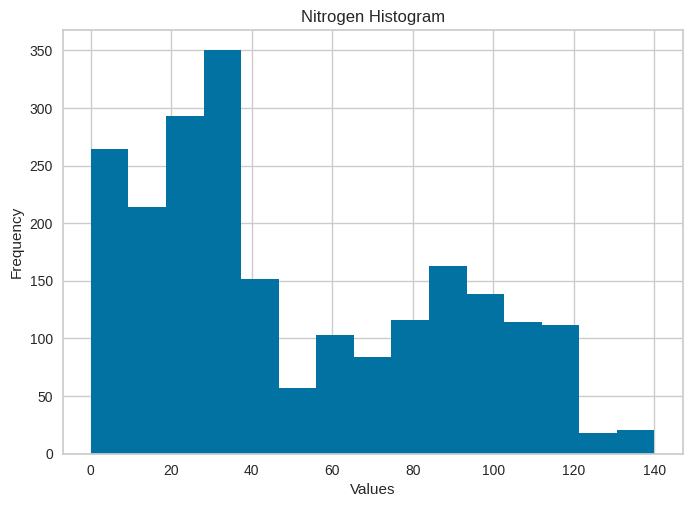

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64


In [9]:
import matplotlib.pyplot as plt

# Criando o histograma
plt.hist(df1['N'], bins='auto')

# Títulos e rótulos
plt.title("Nitrogen Histogram")
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.show()

print(df1['N'].describe())

In [10]:
df1['N'].quantile(0.6)

54.0

- Distribuição assimétrica
- Desvião padrão alto
- Apesar da cauda se estender a direita, é possível observar uma tendencia de valores abaixo de 60 aparecerem mais. Isso pode ser confirmado observando o percentil 60
  

In [11]:
def analysis(variable, name:str):
    plt.hist(variable, bins='auto')
    
    # Títulos e rótulos
    plt.title(f"{name} Histogram")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    
    plt.show()
    
    print(variable.describe())
    

## Phosphorous

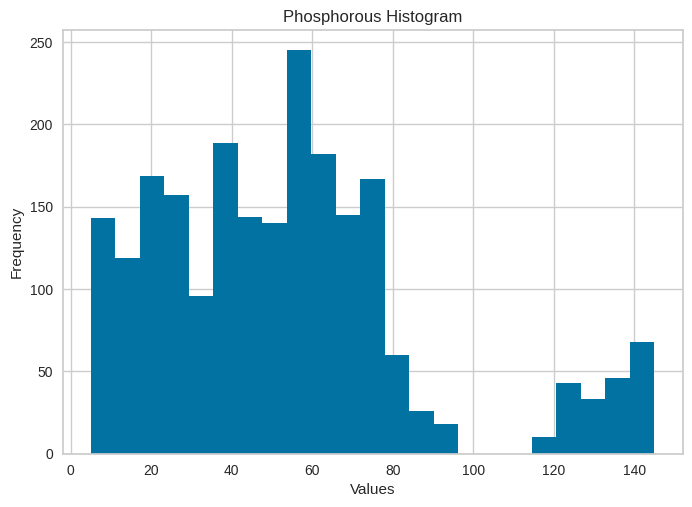

count    2200.000000
mean       53.362727
std        32.985883
min         5.000000
25%        28.000000
50%        51.000000
75%        68.000000
max       145.000000
Name: P, dtype: float64


In [12]:
analysis(df1['P'], name= 'Phosphorous')

- Distribuição assimetrica
- Alta concentração de valores até 80

## Potassium

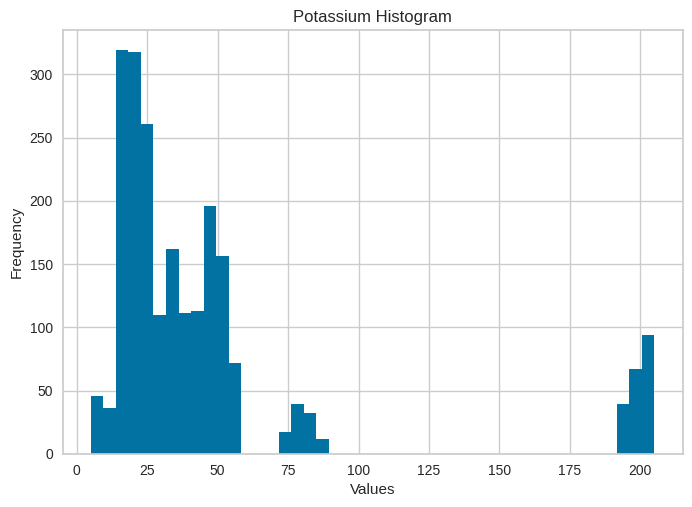

count    2200.000000
mean       48.149091
std        50.647931
min         5.000000
25%        20.000000
50%        32.000000
75%        49.000000
max       205.000000
Name: K, dtype: float64


In [13]:
analysis(df1['K'], name= 'Potassium')

In [14]:
df1['K'].quantile(0.8)

52.0

- Assimetria forte!
- Possível outliers em torno dos valores 200. Análise mais profunda será necessaria
- Concentração de valores alta até o percentil 80 (até 54)

## Label

In [15]:
df1['label'].describe()

count     2200
unique      22
top       rice
freq       100
Name: label, dtype: object

In [16]:
df1['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

- Distribuição uniforme. Nada a declarar por enquanto

## Analyzing the "nature" variables

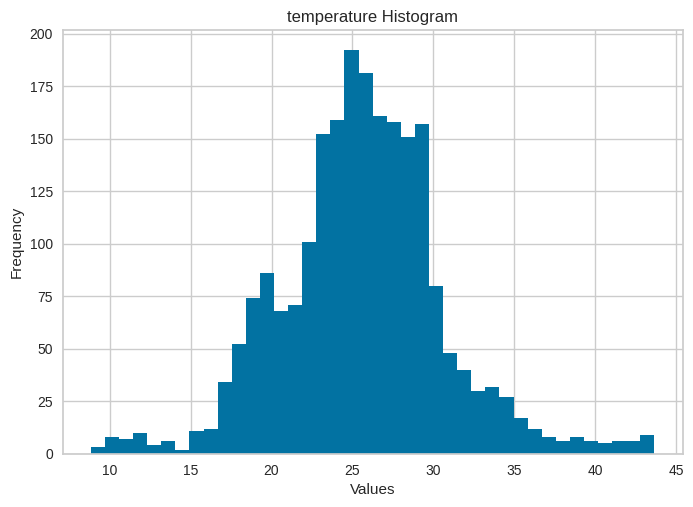

count    2200.000000
mean       25.616244
std         5.063749
min         8.825675
25%        22.769375
50%        25.598693
75%        28.561654
max        43.675493
Name: temperature, dtype: float64




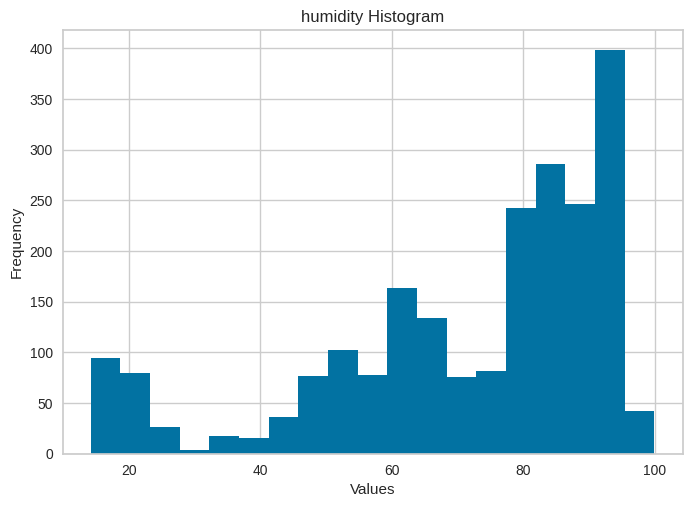

count    2200.000000
mean       71.481779
std        22.263812
min        14.258040
25%        60.261953
50%        80.473146
75%        89.948771
max        99.981876
Name: humidity, dtype: float64




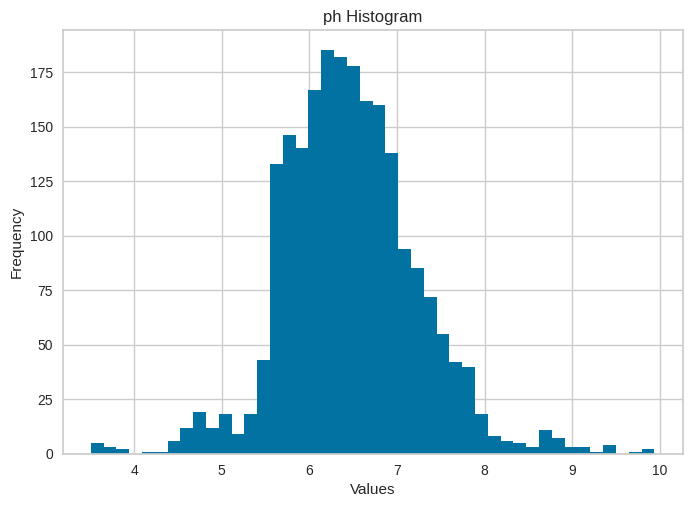

count    2200.000000
mean        6.469480
std         0.773938
min         3.504752
25%         5.971693
50%         6.425045
75%         6.923643
max         9.935091
Name: ph, dtype: float64




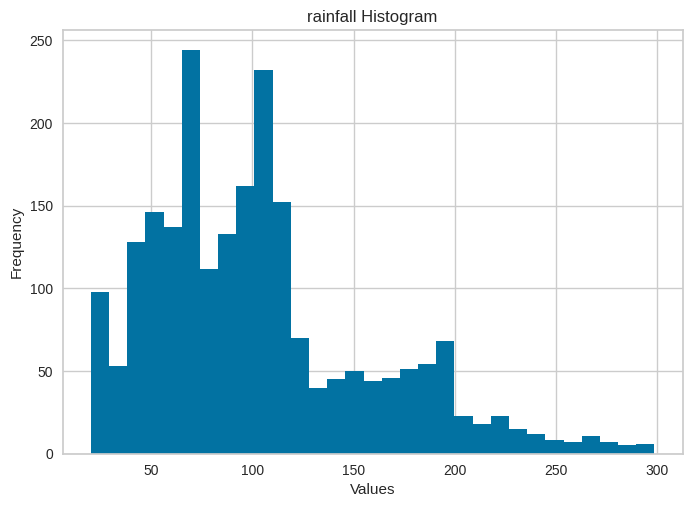

count    2200.000000
mean      103.463655
std        54.958389
min        20.211267
25%        64.551686
50%        94.867624
75%       124.267508
max       298.560117
Name: rainfall, dtype: float64




In [17]:

nature_variables = ['temperature', 'humidity', 'ph', 'rainfall']

for variable in nature_variables:
    analysis(df1[variable], name=variable)
    print('\n')


## Correlation analysis

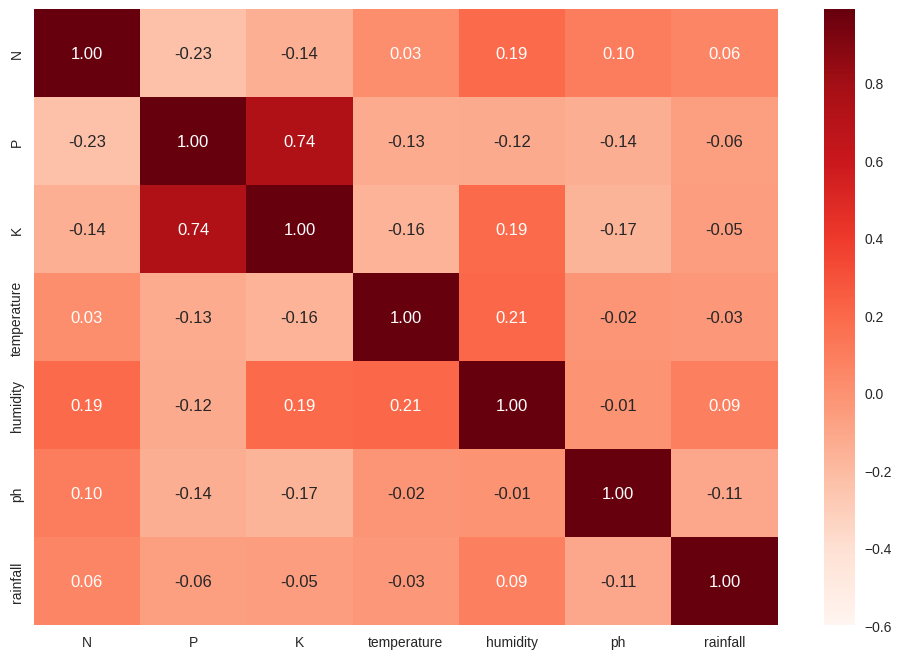

In [18]:
# Tamanho da figura
plt.figure(figsize = (12,8))

# Mapa de calor
# Estamos realçando os valores de correlação entre 0.59 e 0.99, positivo ou negativo.
sns.heatmap(df1.drop('label',axis=1).corr(), annot = True, fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)
plt.show()

- Nitrogenio não possui uma correlação forte com a maioria das variaveis, mesmo considerando que faz parte do trio de macronutrientes para plantas
- P e K possuem uma correlação fortissima. Isso se deve a sua natureza biológica para as plantas, já que "um depende do outro"
- Temperatura possui uma correlação baixa com a maioria das variaveis, mas apresenta correlação fraca-media com umidade
- Umidade possui correlação fraca com a maioria, porém apresenta uma correlação fraca-media para temperatura, N e K
- ph não possui correlações fortes. Comportamento inesperado devido a sua natureza e como importa para P e K
- rainfall não possui correlação

Apesar da correlação fortissima entre P + K, não pretendo remover uma ou criar uma nova variável primeiramente, já que essa correlação é natural pro contexto que estamos trabalhando

In [19]:
# Detecting multicolineatiry with VIF

def verifica_vif(train):

    from statsmodels.stats.outliers_influence import variance_inflation_factor


    # Cria o dataframe
    vif = pd.DataFrame()

    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]

    return vif

In [20]:
verifica_vif(df1.drop('label', axis=1))

,feature,VIF
0,N,3.144079
1,P,9.068963
2,K,5.324539
3,temperature,23.414779
4,humidity,15.070983
5,ph,26.066956
6,rainfall,4.373791


In [21]:

scaler = StandardScaler()

df1_scaled = df1.drop('label', axis=1)

df1_scaled = scaler.fit_transform(df1_scaled)

df1_scaled = pd.DataFrame(df1_scaled, columns=scaler.get_feature_names_out())

In [22]:
df1_scaled

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [23]:
verifica_vif(df1_scaled)

,feature,VIF
0,N,1.097026
1,P,2.630465
2,K,2.797118
3,temperature,1.111104
4,humidity,1.368986
5,ph,1.055803
6,rainfall,1.037426


- Através do VIF conseguimos saber que não há multicoli

## Outliers detection

In [24]:
df1.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [25]:
def detectar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | 
                  (df[coluna] > limite_superior)]

    return outliers, limite_inferior, limite_superior


columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for variables in columns:
    outliers, li, ls = detectar_outliers_iqr(df1, variables)

    print(f'Variable: {variables}')
    print("Limite inferior:", li)
    print("Limite superior:", ls)
    print("Quantidade de outliers:", len(outliers))
    print('\n')


Variable: N
Limite inferior: -73.875
Limite superior: 179.125
Quantidade de outliers: 0


Variable: P
Limite inferior: -32.0
Limite superior: 128.0
Quantidade de outliers: 138


Variable: K
Limite inferior: -23.5
Limite superior: 92.5
Quantidade de outliers: 200


Variable: temperature
Limite inferior: 14.080955682499999
Limite superior: 37.2500728825
Quantidade de outliers: 86


Variable: humidity
Limite inferior: 15.731725873750001
Limite superior: 134.47899768374998
Quantidade de outliers: 30


Variable: ph
Limite inferior: 4.543768066249998
Limite superior: 8.351567354250005
Quantidade de outliers: 57


Variable: rainfall
Limite inferior: -25.022046700000033
Limite superior: 213.84124050000003
Quantidade de outliers: 100




Por enquanto não vou remover os outliers. 

## Modeling

Using pycaret to test different models

In [26]:
# Since our target variable is categorical and not ordinal, I'm going to use labelencoder()

encoder = LabelEncoder()

y = encoder.fit_transform(df1['label'])
df1_scaled['label'] = y


from sklearn.model_selection import train_test_split

# X = características (features), y = alvo (target)
train, test = train_test_split(df1_scaled, test_size=0.2, random_state=42)



In [27]:
# Now we have our dataset ready for modeling. We can use PyCaret to quickly compare different classification models and find the best one for our data.

s = setup(df1_scaled, target = 'label', session_id = 123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(2200, 8)"
4,Transformed data shape,"(2200, 8)"
5,Transformed train set shape,"(1540, 8)"
6,Transformed test set shape,"(660, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [28]:
best = compare_models()

In [29]:
predictions = predict_model(best, data = test)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9955,1.0000,0.9955,0.9958,0.9954,0.9952,0.9953


,N,P,K,temperature,humidity,ph,rainfall,label,prediction_label,prediction_score
1451,1.366828,-1.102623,-0.022693,0.765965,1.044445,-0.367590,-1.404208,15,15,1.00
1334,1.285547,-1.375529,0.056302,0.111228,0.675725,-0.271588,-0.983388,21,21,1.00
1761,0.228893,0.261907,0.016804,3.504974,0.982541,0.610029,0.205919,17,17,1.00
1735,-0.177513,0.201261,0.135296,1.711417,0.856914,0.459949,-0.089600,17,17,0.98
1576,-0.556825,2.536124,2.998848,-0.533707,0.863614,-1.119294,0.275559,0,0,1.00


In [43]:
best.__class__.__name__


'RandomForestClassifier'

In [45]:
save_model(best, f"/home/lucas/Documents/Estudos/End-to-End Farm detection/model/{best.__class__.__name__}")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['N', 'P', 'K', 'temperature',
                                              'humidity', 'ph', 'rainfall'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=Non...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None